# Introduction:
The titanic dataset is being investigated here. The dataset has been taken from the "Kaggle" website , which can be found here : 

"https://www.kaggle.com/c/titanic/data "

The questions being dealt are with what were the survival rates over various other conditions such as with respect to females over males, children over adults and etc.

# Data Acquisition

In [31]:
#loading the data.
import pandas as pd 
filename=pd.read_csv("C:\\Users\\Jon Targaryen\\Desktop\\Udacity\\NanoDegree\\Intro to Prog\\final proje\\titanic_data.csv")

Reading the dataset from the file "titanic_data.csv" using the pandas built in function ".read_csv"

In [32]:
#trying to find any duplicate row entries.
filename_data_duplicates = filename.duplicated().sum()
print ('Number of duplicate entries: '+str((filename_data_duplicates)))

Number of duplicate entries: 0


Hence, there are no duplicate entrties in the dataset. Therefore , we can start analyzing.

In [33]:
#getting the column length info
filename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The actual length is "891". But some data entry is missing in "Age" , "Cabin" and "Embarked".I will try sorting these missing entries.

# Data Cleaning

In [34]:
#finding the  count of missing entries of each column.
filename.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see here that "Age" has 177 empty entries. "Cabin" has 687 empty entries. "Embarked" has 2 empty entries.Let's handle these missing entries(and in turn , the respective rows) one by one.

In [35]:
#finding the missing entries from "Age" column , making to "NaN", and then dropping those rows.
import numpy as np
import pandas as pd
filename['Age'].replace('',np.nan, inplace=True)
filename
filename.dropna(subset=['Age'],inplace=True)
len(filename)

714

Its tough to assign values to missing values of "Age" . 2 things can be done : 1) Either we can find the average of the column "Age" and assign that mean value to the missing entries or 2) We can remove the all the empty entries with regards to age as there is no other way to know the missing age entries.

I removed the empty age entries.

Since Pandas don't recognize empty strings as null(or NaN). Therefore to use "dropna" (which would remove NaN) , I first converted the empty string with "Age" to "np.nan" objects using "replace()" and then called "dropna" to remove the null entries. As can be seen by "len" funtion here, the "filename" dataset now has 714 entries i.e 177 missing "Age" entries have been removed from the original 891 length.

In [36]:
#finding the missing entries from the column " Embarked"
missing_embarkation=filename[filename['Embarked'].isnull()]
missing_embarkation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN



Now, considering the empty entries of "Embarked" , there are 2 empty entries. I will try seeing whether I can get any information from other columns regarding these empty entries.

In [37]:
#trying to fill the missing entries of "Embark" column by finding information from other columns, with respect to similar column entries.
embarked_related_entries_in_other_columns=filename[(filename['Embarked'].notnull()) & ((filename['Ticket'] == '113572') | (filename['Cabin'] == 'B28')) |filename['Fare']==80]
len(embarked_related_entries_in_other_columns)

0

I tried to get the missing entries of "Embarked" from other columns, with regards to being same "Ticket" number or "Cabin" number or "Fare" amount but to no avail.

In [38]:
#finding the passenger counts of all stations.
filename["Embarked"].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

I found out the maximum occurence value of "Embarked" is "S" which stands for Southampton. So, I will put the empty entries to "S" since there are only 2 missing entries which wasn't the case as in "Age".

In [20]:
#Assigning the missing station entries to the maximum occurence station count .
filename['Embarked'].fillna('S',inplace=True)
filename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Therefore, I have made the missing entries of "Embarked" assigned to "S".Hence, "Age" and "Embarked" have been sorted out now.

In [11]:
#dropping the irrelevant columns with respect to the analysis being done.
filename_cleaned=filename.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
filename_cleaned.head(4)
filename_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Embarked    714 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ KB


Now "Cabin" missing entries were 687. If the same logic as of "Age" entries was applied, we would lose almost all of the data. Hence, for that reason, lets not consider the column "Cabin" at all in our analysis instead of removing those missing entry rows of "Cabin" as we did for "Age".

Since we are talking about removing columns, I removed various other columns too which we wouldn't be needing for analysis.

For analysis: our main question would be to find the number of survivors over different factors,such as ,with respect to ages, with respect to ticket class, boarding station. Keeping these things in mind, we wouldn't be needing the columns such as " PassengerId", "Name", "Ticket", "Fare" and ,ofcourse, as mentioned before, the column " Cabin".

# Questioning + Exploring + Drawing Conclusions:


# How was the survival rate of females? Were females given importance over men?


Total passengers taken into dataset: 714
Total survivors: 290
Total deaths: 424
Total male passengers: 453
Total female passengers: 261
Number of males who survived: 93
Number of males who died: 360
Number of females who survived: 197
Number of females who died: 64


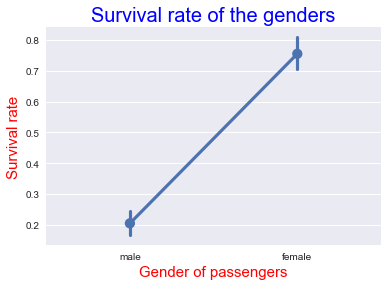

In [39]:
#determining total passengers who survived and who couldn't survive.
total_passengers=len(filename_cleaned)
print ("Total passengers taken into dataset: "+str(total_passengers))

survived_count=filename_cleaned[filename_cleaned['Survived']==1]
total_survivors=len (survived_count)
print ("Total survivors: " +str(total_survivors))
death_count=filename_cleaned[filename_cleaned['Survived']==0]
total_deaths=len (death_count)
print ("Total deaths: " +str(total_deaths))

#determining total male count and female count who took the journey.
male_count=filename_cleaned[filename_cleaned['Sex']=='male']
male_passengers=len (male_count)
print ("Total male passengers: "+str(male_passengers))
female_count=filename_cleaned[filename_cleaned['Sex']=='female']
female_passengers=len (female_count)
print ("Total female passengers: "+ str(female_passengers))

#determing male passengers who survived and who couldn't survive.
male_survivors = filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Sex'] == 'male') ]
number_of_male_survivors=len(male_survivors)
print ("Number of males who survived: " +str(number_of_male_survivors))

male_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Sex'] == 'male') ]
number_of_male_deaths=len(male_deaths)
print ("Number of males who died: " +str(number_of_male_deaths))

#determing female passengers who survived and who couldn't survive.
female_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Sex'] == 'female') ]
number_of_female_survivors=len(female_survivors)
print ("Number of females who survived: " +str(number_of_female_survivors))

female_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Sex'] == 'female') ]
number_of_female_deaths=len(female_deaths)
print ("Number of females who died: " +str(number_of_female_deaths))


#plotting the survival rates of genders
import seaborn as sns
import matplotlib.pyplot as plt


pointplot=sns.pointplot(data=filename_cleaned,x="Sex",y="Survived") #data to plot
pointplot.set_xlabel("Gender of passengers",fontsize=15,color="red")
pointplot.set_ylabel("Survival rate",fontsize=15,color="red")
pointplot.set_title("Survival rate of the genders",fontsize=20,color="blue")
sns.plt.show()

The female survival rate ( number of females who survived/ total female passengers=197/261=0.754) The male survival rate ( number of males who survived/ total male passengers=93/453=0.205) Hence, the females were given importance to survive.

# How was the survival rate of children(age <= 18) compared to adults? Were the children given importance?


no     575
yes    139
Name: child, dtype: int64
Number of adults: 575
Number of adult survivors: 220
Number of adult deaths: 355
Number of children: 139
Number of child survivors: 70
Number of child deaths: 69


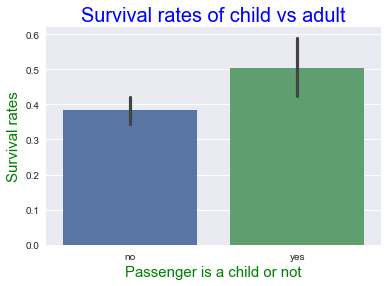

In [41]:
# A function to determine whether a passenger is a child or not . The age of 18 being the threshold for differentiating 
#between children and adults.

def child(x):
    if x > 18:
        return "no"
    else:
        return "yes"
    
#Applying the above developed function on the column "Age" to determine whether a passenger is child or not.
filename_cleaned["child"] = pd.Series(filename_cleaned["Age"].apply(child))
print (filename_cleaned["child"].value_counts())

#Determining whether the passenger is an adult or not.
adult_count=len(filename_cleaned[filename_cleaned["child"]=="no"])
print ("Number of adults: "+ str(adult_count))

#Determining whether the passenger is an adult and whether they survived.
adult_survivors=filename_cleaned[(filename_cleaned['child']=="no") & (filename_cleaned['Survived'] == 1)]
adult_survivors_count=len(adult_survivors)
print ("Number of adult survivors: " + str(adult_survivors_count))

#Determining whether the passenger is an adult and couldn't surive.
adult_deaths=filename_cleaned[(filename_cleaned['child']=="no") & (filename_cleaned['Survived'] == 0)]
adult_death_count=len(adult_deaths)
print ("Number of adult deaths: " + str(adult_death_count))


#Determining whether the passenger is a child or not.
child_count=len(filename_cleaned[filename_cleaned["child"]=="yes"])
print ("Number of children: "+ str(child_count))

#Determining whether the passenger is a child and whether they survived.
child_survivors=filename_cleaned[(filename_cleaned['child']=="yes") & (filename_cleaned['Survived'] == 1)]
child_survivors_count=len(child_survivors)
print ("Number of child survivors: " + str(child_survivors_count))

#Determining whether the passenger is a child and couldn't survive.
child_deaths=filename_cleaned[(filename_cleaned['child']=="yes") & (filename_cleaned['Survived'] == 0)]
child_death_count=len(child_deaths)
print ("Number of child deaths: " + str(child_death_count))

#plotting the survival rates of child vs adult 
import seaborn as sns
import matplotlib.pyplot as plt

barplot =sns.barplot(data=filename_cleaned,x="child",y="Survived") #data to plot
barplot.set_xlabel("Passenger is a child or not",fontsize=15,color="green")
barplot.set_ylabel("Survival rates",fontsize=15,color="green")
barplot.set_title("Survival rates of child vs adult",fontsize=20,color="blue")
sns.plt.show()

First,I have defined the procedure "child" and then calling it with the ".apply" function to develop a separate column "child" in the dataset. Then the "value_counts" gave the number of children and number of adults count. I then found the count of children who survived and count of adults who survived by using the "&" logical operation.

Then after getting the numbers, I just implemented the child count & adult count in the bargraph with their survival rates.

The child survival rate (number of child survivors/number of children= 70/139=0.503 ) and adult survival rate (number of adult survivors/number of adults =220/575=0.382) is shown in the graph.

Hence, looking at the numbers ,and the graph supporting the numbers, we can conclude that the children were given importance over adults to survive


# How was the survival rate compared to different classes of tickets(Pclass)?

3    355
1    186
2    173
Name: Pclass, dtype: int64
Number of first class passengers: 186
Number of first class passengers who survived: 122
Number of first class passengers who died: 64
Number of second class passengers: 173
Number of second class passengers who survived: 83
Number of second class passengers who died: 90
Number of third class passengers: 355
Number of third class passengers who survived: 85
Number of third class passengers who died: 270


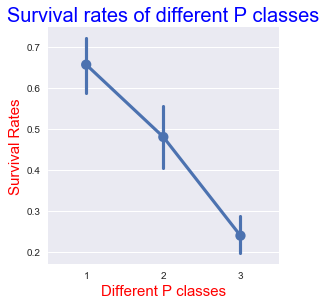

In [43]:
#determing the total counts for all classes.
print (filename_cleaned['Pclass'].value_counts())

#finding the total counts for class1 and finding how many survived and how many couldn't survive in class 1.
first_class_count=len(filename_cleaned[filename_cleaned['Pclass']==1])
print ("Number of first class passengers: "+str(first_class_count))

first_class_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Pclass'] == 1) ]
number_of_first_class_survivors=len(first_class_survivors)
print ("Number of first class passengers who survived: " +str(number_of_first_class_survivors))

first_class_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Pclass'] == 1) ]
number_of_first_class_deaths=len(first_class_deaths)
print ("Number of first class passengers who died: " +str(number_of_first_class_deaths))


#finding the total counts for class2 and finding how many survived and how many couldn't survive in class 2.
second_class_count=len(filename_cleaned[filename_cleaned['Pclass']==2])
print ("Number of second class passengers: "+str(second_class_count))

second_class_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Pclass'] == 2) ]
number_of_second_class_survivors=len(second_class_survivors)
print ("Number of second class passengers who survived: " +str(number_of_second_class_survivors))

second_class_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Pclass'] == 2) ]
number_of_second_class_deaths=len(second_class_deaths)
print ("Number of second class passengers who died: " +str(number_of_second_class_deaths))


#finding the total counts for class3 and finding how many survived and how many couldn't survive in class 3.
third_class_count=len(filename_cleaned[filename_cleaned['Pclass']==3])
print ("Number of third class passengers: "+str(third_class_count))

third_class_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Pclass'] == 3) ]
number_of_third_class_survivors=len(third_class_survivors)
print ("Number of third class passengers who survived: " +str(number_of_third_class_survivors))

third_class_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Pclass'] == 3) ]
number_of_third_class_deaths=len(third_class_deaths)
print ("Number of third class passengers who died: " +str(number_of_third_class_deaths))


#plotting survival rates of different classes
import matplotlib.pyplot as plt
import seaborn as sns

factorplot=sns.factorplot(x="Pclass", y="Survived", data=filename_cleaned)#data to plot
factorplot.set_xlabels("Different P classes",fontsize=15,color="red")
factorplot.set_ylabels("Survival Rates",fontsize=15,color="red")

sns.plt.title("Survival rates of different P classes",fontsize=20,color="blue")
sns.plt.show()

The survival rate of class 1 passengers ( Number of first class passengers who survived/Number of first class passengers=122/186=0.655). The survival rate of class 2 passengers ( Number of second class passengers who survived/Number of second class passengers=83/173=0.479). The survival rate of class 3 passengers ( Number of third class passengers who survived/Number of third class passengers=85/355=0.239).

Hence, looking at the numbers and graph, we can conclude that the survival rate was more for class 1 passengers when compared to class 2 passengers and class 2 passengers had a more survival rate when compared to class 3 passengers.

We can think that probabaly the safety measures , or exit ways, or escape ways,were better and easy for class 1 over class 2 and class 2 over class 3. We can attribute these difference in measures owing to the range of tickets class .

# How was the survival rate for people with families and for someone who was travelling alone?


Number of lone travellers: 404
Number of family travellers: 310
yes    404
no     310
Name: lone_traveller, dtype: int64
Number of lone travel passengers who survived: 130
Number of family travel passengers who survived: 160


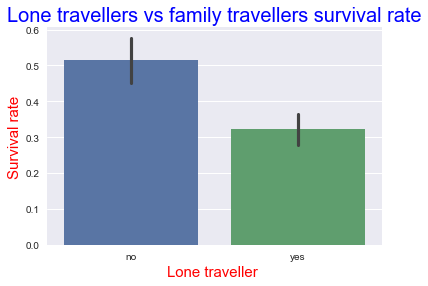

In [51]:
#determing the total count of passengers who were travelling alone. 
alone_travellers= filename_cleaned[(filename_cleaned['SibSp']==0) & (filename_cleaned['Parch'] == 0) ]
number_of_lone_travellers=len(alone_travellers)
print ("Number of lone travellers: "+str(number_of_lone_travellers))

#determing the total count of passengers who were travelling with atleast one family member(either child/spouse/parent or sibling).
family_travellers= filename_cleaned[(filename_cleaned['SibSp']!=0) | (filename_cleaned['Parch'] != 0) ]
number_of_family_travellers=len(family_travellers)
print ("Number of family travellers: "+str(number_of_family_travellers))

#creating a function to find about the lone travellers.
def lone_traveller(x):
    if x['SibSp']==0 :
        if x['Parch']==0:
            return "yes"
    
    return "no"

#developing a new column ,to determine the lone travellers
filename_cleaned["lone_traveller"]=pd.Series(filename_cleaned.apply(lone_traveller,axis=1))

print (filename_cleaned["lone_traveller"].value_counts())


#determining the number of lone travellers who survived.
lone_travel_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['lone_traveller'] == "yes") ]
number_of_lone_travel_survivors=len(lone_travel_survivors)
print ("Number of lone travel passengers who survived: " +str(number_of_lone_travel_survivors))

#determining the number of family travellers who survived.
family_travel_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['lone_traveller'] == "no") ]
number_of_family_travel_survivors=len(family_travel_survivors)
print ("Number of family travel passengers who survived: " +str(number_of_family_travel_survivors))

#plotting survival rates of lone passengers vs passengers travelling with any family member
import seaborn as sns
import matplotlib.pyplot as plt

barplot=sns.barplot(data=filename_cleaned, x="lone_traveller", y="Survived")#data to plot
barplot.set_xlabel("Lone traveller ", fontsize=15,color="red")
barplot.set_ylabel("Survival rate", fontsize=15,color="red")
barplot.set_title("Lone travellers vs family travellers survival rate",fontsize=20,color="blue")
sns.plt.show()


A separate column of "lone_traveller" was created using the ". apply" method. The percentage of lone travellers who survived (Number of lone travel passengers who survived/Number of lone travellers=130/404=0.321). The percentage of family travellers who survived (Number of family travel passengers who survived/Number of family travellers=160/310=0.516).

Hence, the graph, showing these numbers ,shows us that the passengers who were travelling with families were given importance to survive when compared to the ones who were travelling alone.

# Which embarkation station people had the higher survival chance? Can a patter be found with people from same places?

S    556
C    130
Q     28
Name: Embarked, dtype: int64
Number of passengers from Southampton: 556
Number of S station passengers who survived: 203
Number of S station passengers who died: 353
Number of passengers from Cherbourg: 130
Number of C station passengers who survived: 79
Number of C station passengers who died: 51
Number of passengers from Queenstown: 28
Number of Q station passengers who survived: 8
Number of Q station passengers who died: 20


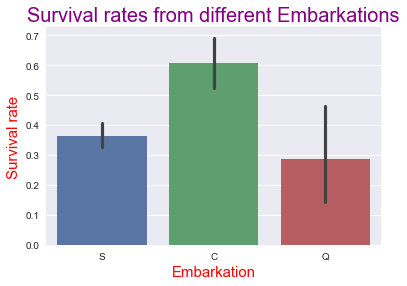

In [52]:
#determining the total count of passengers from each station.
print (filename_cleaned["Embarked"].value_counts())

#finding the number of passengers from Station 'S' and the number of passengers who survived and who couldn't .
passengers_from_S_station=len(filename[filename_cleaned["Embarked"]=="S"])
print ("Number of passengers from Southampton: "+str(passengers_from_S_station))
S_station_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Embarked'] == "S")]
number_of_S_station_survivors=len(S_station_survivors)
print ("Number of S station passengers who survived: " +str(number_of_S_station_survivors))
S_station_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Embarked'] == "S")]
number_of_S_station_deaths=len(S_station_deaths)
print ("Number of S station passengers who died: " +str(number_of_S_station_deaths))

#finding the number of passengers from Station 'C' and the number of passengers who survived and who couldn't .
passengers_from_C_station=len(filename[filename_cleaned["Embarked"]=="C"])
print ("Number of passengers from Cherbourg: "+str(passengers_from_C_station))
C_station_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Embarked'] == "C")]
number_of_C_station_survivors=len(C_station_survivors)
print ("Number of C station passengers who survived: " +str(number_of_C_station_survivors))
C_station_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Embarked'] == "C")]
number_of_C_station_deaths=len(C_station_deaths)
print ("Number of C station passengers who died: " +str(number_of_C_station_deaths))

#finding the number of passengers from Station 'Q' and the number of passengers who survived and who couldn't .
passengers_from_Q_station=len(filename[filename_cleaned["Embarked"]=="Q"])
print ("Number of passengers from Queenstown: "+str(passengers_from_Q_station))
Q_station_survivors= filename_cleaned[(filename_cleaned['Survived']==1) & (filename_cleaned['Embarked'] == "Q")]
number_of_Q_station_survivors=len(Q_station_survivors)
print ("Number of Q station passengers who survived: " +str(number_of_Q_station_survivors))
Q_station_deaths= filename_cleaned[(filename_cleaned['Survived']==0) & (filename_cleaned['Embarked'] == "Q")]
number_of_Q_station_deaths=len(Q_station_deaths)
print ("Number of Q station passengers who died: " +str(number_of_Q_station_deaths))


import matplotlib.pyplot as plt
import seaborn as sns

#data to create bar plot
barplot=sns.barplot( x="Embarked", y="Survived",data=filename_cleaned)

#setting the x label,y label,title and plotting.
barplot.set_xlabel("Embarkation",fontsize=15,color="red") 
barplot.set_ylabel("Survival rate",fontsize=15,color="red") 
barplot.set_title("Survival rates from different Embarkations",fontsize=20,color="purple") 
sns.plt.show()


Survival rate of S station passengers: 203/556=0.365. Survival rate of C station passengers: 79/130=0.607. Survival rate of Q station passengers: 8/28=0.285.

Hence, the C station passengers had a higher survival rate. Probably, the passengers from in and around Cherbourg had a better way of dealing with the cold temperatures when the ship was hit.

# How was the survival rate of females travelling with children only? Can this data be found?


Survival rate of females travelling with either children or parents can be found but not separately only with children.
As the dataset has "Parch" which gives the information about parents or children as a collection.

Hence, if Sex== female, Parch== 1, that might either be parent to the female or the child of the female. Even in this , if we start looking at the "Age" column and look at "Name" column and compare "Age" and make a list of "surname" from "Name" , it gets very complicated.Moreover, I already have removed the "Name" column in the starting.

Conclusive statement with respect to female with children only cannot be made with this data.

# On the whole, what % died and what % survived?


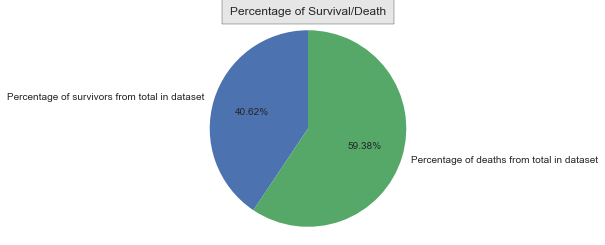

In [53]:
import matplotlib.pyplot as plt

#data to plot
labels='Percentage of survivors from total in dataset', 'Percentage of deaths from total in dataset'
sizes=[total_survivors,total_deaths]


#plotting pie diagram with % of survivors and deaths.
plt.pie(sizes,  labels=labels,autopct='%.2f%%',startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Survival/Death', bbox={'facecolor':'0.9', 'pad':8})
plt.show()

From the total aboard of 714 in the dataset,  290 survived (290/714= 40.62%) &  424 died (424/714=59.38%).

# Which age group survived better?


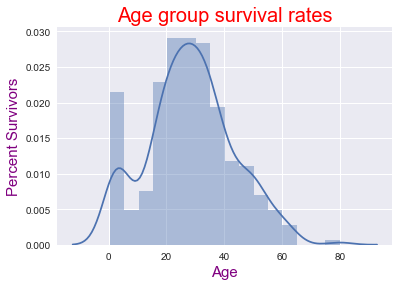

In [54]:
import seaborn as sns
#comparing "Survival=1" and "Age".
survivors_ages = filename_cleaned[filename_cleaned["Survived"] == 1]["Age"]
distplot=sns.distplot( survivors_ages)

#setting the x label,y label,title and plotting.
distplot.set_xlabel("Age",fontsize=15,color="purple")
distplot.set_ylabel("Percent Survivors",fontsize=15,color="purple")
distplot.set_title('Age group survival rates',fontsize=20,color="red")
sns.plt.show()

Comparitively,passengers with ages in between 20-40 had better survival rate.

# Drawbacks with data:


Not having a separate list for number of parents and children a particular passenger had because as seen, we couldn't develop the data of number of lone femlaes travelling with children only.

The missing "Age" entries which removed 177 rows of data.

# Conclusions:


Children were given importance to survive over adults. Females were given importance to survive over men. Higher class ticket passengers survived probably owing to some special escape measures, or more safety measures for people with better class tickets. Passengers travelling with families were given importance to survive over someone who was travelling alone. Cherbourg place people survived probably owing to better survival methods known to people from that part of country.

# References:


Udacity's :Intro to Data Analysis.

Udacity's : Descriptive Statistics/Inferential Statistics.

https://www.kaggle.com/c/titanic

(http://stanford.edu/~mwaskom/software/seaborn/)

(http://pandas.pydata.org/pandas-docs/stable/#)

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/gallery.html

